# Predicting Diabetes

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Do plotting inline instead of a separate window 
%matplotlib inline


## Load and review data

In [3]:
df = pd.read_csv("./data/pima-data.csv")

In [4]:
df.shape

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


## Check for null values

In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


## Checking for correlated Columns

In [9]:
def plot_corr(df, size=11):
    """
        Functions plot a graphical correlation matrix for each pair of columns in the Dataframe
        
        Input:
            df: Pandas Dataframe
            size: vertical and horizontal size of the plot
            
        Display:
            Matrix of correlation between columns. Blue-cyan-green-darkgreen-yellow => less to more correlated
                                                    0 ---------------------- 1
                                                    Expect a darkline runnning from top-left to bottom-right
                                                    
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), (corr.columns))    
    plt.yticks(range(len(corr.columns)), (corr.columns))

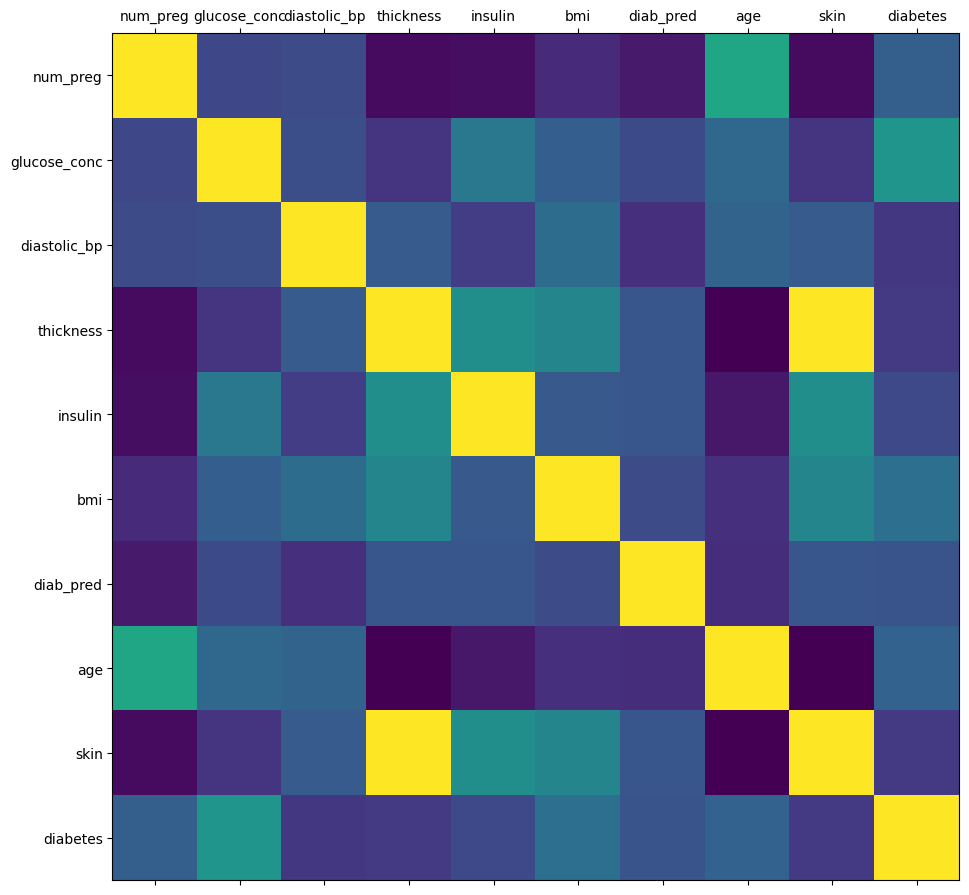

In [10]:
plot_corr(df)

In [11]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [12]:
del df["skin"] # drop the skin color from the table

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


# check if the is a right correlation

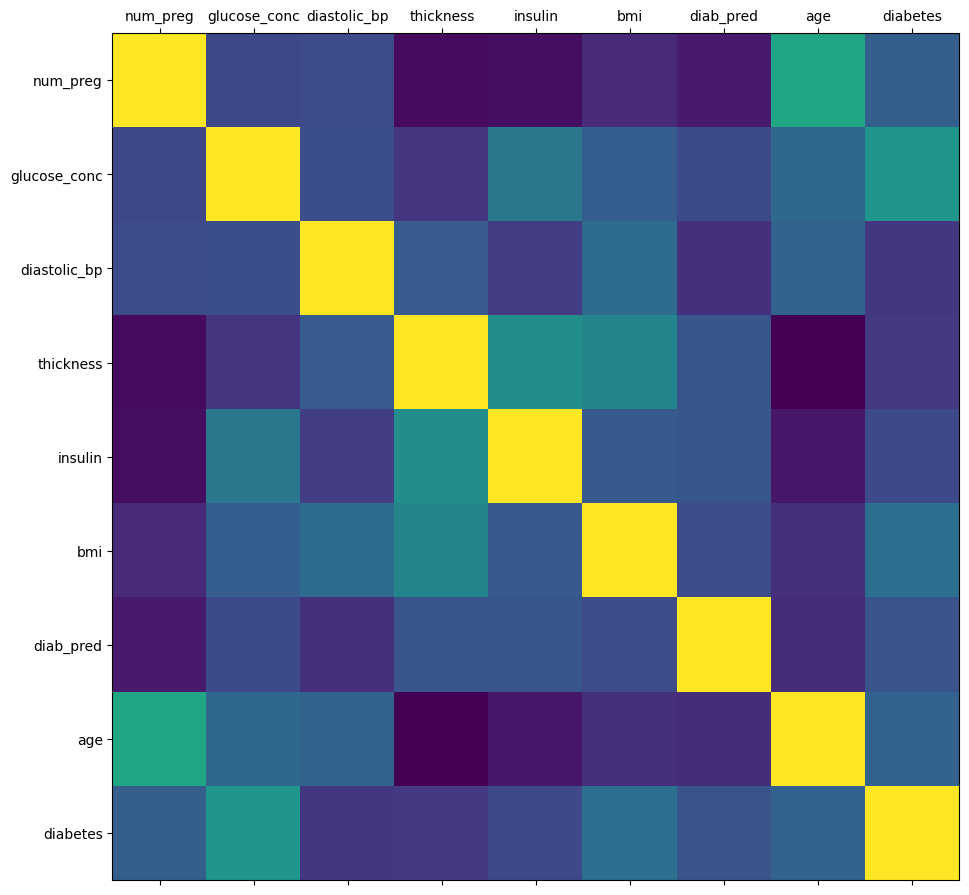

In [14]:
plot_corr(df)

## Check data Types of the data

In [15]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [16]:
diabetes_map = {True: 1, False: 0}
df["diabetes"] = df["diabetes"].map(diabetes_map)

In [17]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
num_true = len(df.loc[df["diabetes"] == True])
num_false = len(df.loc[df["diabetes"] == False])

print(f"Number of True Cases: {num_true} {round((num_true/(num_true + num_false)) * 100, 2)}%")
print(f"Number of False Cases: {num_false} {round((num_false/(num_true + num_false)) * 100, 2)}%")


Number of True Cases: 268 34.9%
Number of False Cases: 500 65.1%


### Splitting the data into testing and training

70% for training, 30% for testing

In [19]:
from sklearn.model_selection import train_test_split

features_columns_names = list(df.drop(columns=["diabetes"]).columns)
predicted_class_name = ["diabetes"]

X = df[features_columns_names].values
y = df[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

We need to ensure we have the desired train and test split

In [20]:
print(f"In training set: {round((len(X_train)/ len(df.index)) * 100, 2)}%")
print(f"In training set: {round((len(X_test)/ len(df.index)) * 100, 2)}&")

In training set: 69.92%
In training set: 30.08&


### Verifying if predicted values was splitted correctly

In [21]:
print(f"Original True: {num_true}, ({round((num_true/(num_true + num_false)) * 100, 2)}%)")
print(f"Original False: {num_false},  ({round((num_false/(num_true + num_false)) * 100, 2)}%)")
print("")
print(f"Training True: {len(y_train[y_train[:] == 1])}, ({round((len(y_train[y_train[:] == 1]) / len(y_train)) * 100, 2)})%")
print(f"Training False: {len(y_train[y_train[:] == 0])}, ({round((len(y_train[y_train[:] == 0]) / len(y_train)) * 100, 2)})%")
print("")
print(f"Test True: {len(y_test[y_test[:] == 1])}, ({round((len(y_test[y_test[:] == 1]) / len(y_test)) * 100, 2)})%")
print(f"Test False: {len(y_test[y_test[:] == 0])}, ({round((len(y_test[y_test[:] == 0]) / len(y_test)) * 100, 2)})%")


Original True: 268, (34.9%)
Original False: 500,  (65.1%)

Training True: 188, (35.01)%
Training False: 349, (64.99)%

Test True: 80, (34.63)%
Test False: 151, (65.37)%


### Post-split data preparation

### Hidden Missing Values

In [23]:
features_columns_names
sum_missing = 0

print(f"rows in the Dataframe: {len(df)}")
for column in features_columns_names:
    total_value = len(df.loc[df[column] == 0])
    sum_missing += total_value
    print(f"rows of missing {column}: {total_value}")
print(f"Percentage of missing values in the dataset is: {round((sum_missing/len(df)) * 100,2)}%")

rows in the Dataframe: 768
rows of missing num_preg: 111
rows of missing glucose_conc: 5
rows of missing diastolic_bp: 35
rows of missing thickness: 227
rows of missing insulin: 374
rows of missing bmi: 11
rows of missing diab_pred: 0
rows of missing age: 0
Percentage of missing values in the dataset is: 99.35%


from the above outputs it shows that there almost 50% of data which has a 0 values

### Impute the ) values using the mean

In [69]:
from sklearn.impute import SimpleImputer

fill_zero = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_zero.fit_transform(X_train)
X_test = fill_zero.fit_transform(X_test)



### Training Initial Algorithm - Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train.ravel())

GaussianNB()

## Performance on Testing Data

In [74]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)

print(f"Accuracy Score: {round(accuracy_score(y_test, pred) * 100, 2)} %")

Accuracy Score: 73.59 %


### Metrics

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

print(" ")
print("Classification Report")
print(classification_report(y_test, pred))

Confusion Matrix
[[118  33]
 [ 28  52]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

### Checking Matrics and accuracy score

In [79]:
rf_pred = rf_model.predict(X_test)

print("Accuracy Score")
print(f"score: {round(accuracy_score(y_test, rf_pred) * 100)}%")
print("")
print("Confusion Matrix")
print(f"metrics: {confusion_matrix(y_test, rf_pred)}")
print("")
print("Classification Report")
print(classification_report(y_test, rf_pred))

Accuracy Score
score: 74%

Confusion Matrix
metrics: [[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=2, cv=10, refit=False, class_weight="balanced", max_iter=85)

lr_model.fit(X_train, y_train.ravel())

lr_pred = lr_model.predict(X_test)

print("Accuracy Score")
print(f"score: {round(accuracy_score(y_test, lr_pred) * 100)}%")
print("")
print("Confusion Matrix")
print(f"metrics: {confusion_matrix(y_test, lr_pred)}")
print("")
print("Classification Report")
print(classification_report(y_test, lr_pred))

Accuracy Score
score: 72%

Confusion Matrix
metrics: [[111  40]
 [ 25  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       151
           1       0.58      0.69      0.63        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.72       231

